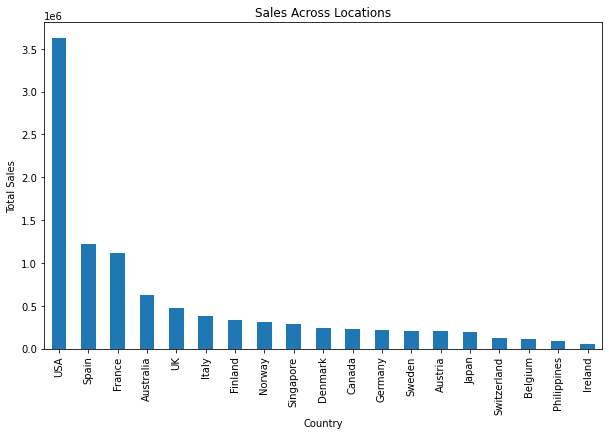

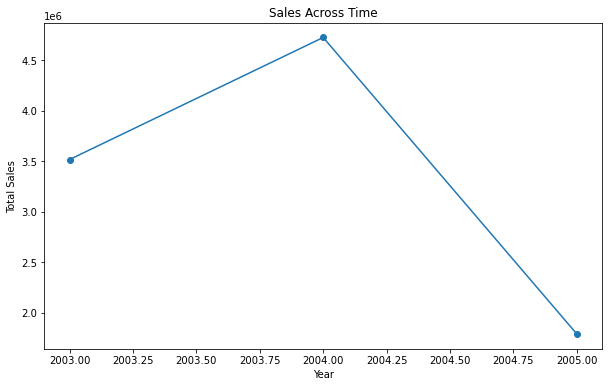

In [80]:

"""
MATPLOTLIB based visualization
"""

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV file
data = pd.read_csv('sales_data_sample.csv',encoding='latin-1')

# Create a bar chart of sales across locations
plt.figure(figsize=(10, 6))
data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales Across Locations')
plt.show()

# Create a line chart of sales across time
plt.figure(figsize=(10, 6))
data.groupby('YEAR_ID')['SALES'].sum().plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Across Time')
plt.show()

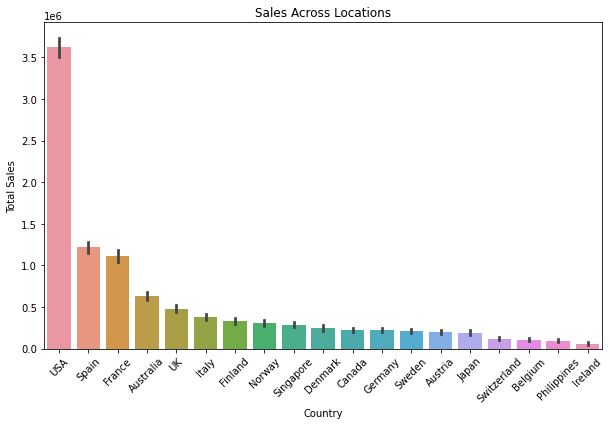

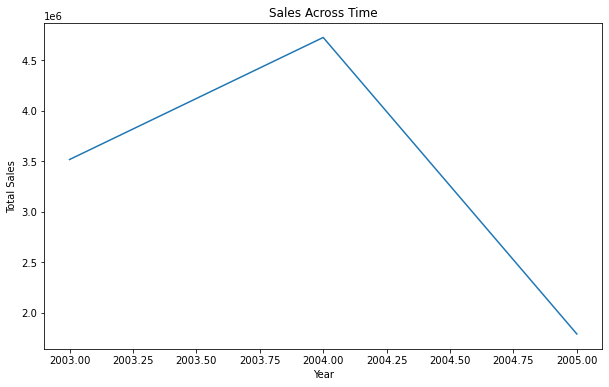

In [81]:

"""
Seaborn based visualization
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart of sales across locations
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNTRY', y='SALES', data=data, estimator=sum, order=data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).index)
plt.xlabel('Country')
plt.xticks(rotation=45) 
plt.ylabel('Total Sales')
plt.title('Sales Across Locations')
plt.show()

# Create a line chart of sales across time
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR_ID', y='SALES', data=data.groupby('YEAR_ID')['SALES'].sum().reset_index())
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Across Time')
plt.show()


In [82]:

"""
PLOTLY based visualization
"""

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Create a bar chart of sales across locations
fig = px.bar(data, x='COUNTRY', y='SALES', barmode='group')
fig.update_layout(title='Sales Across Locations')
fig.show()

# Create a line chart of sales across time
fig = px.line(data.groupby('YEAR_ID')['SALES'].sum().reset_index(), x='YEAR_ID', y='SALES')
fig.update_layout(title='Sales Across Time')
fig.show()

# Create a line chart of sales across time
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data['YEAR_ID'], y=data['SALES'], mode='lines+markers', name='Sales'))
fig2.update_layout(title='Sales Across Time')
fig2.show()


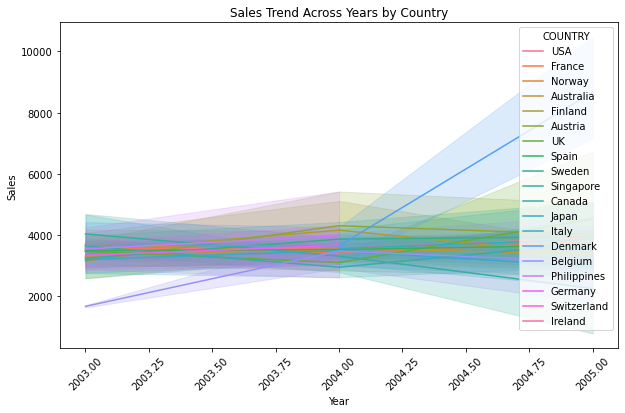

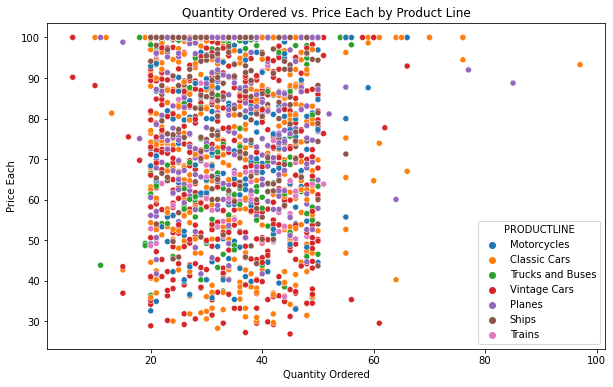

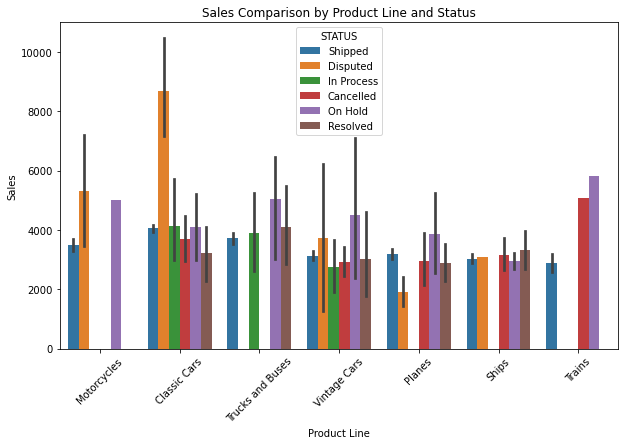

In [83]:
"""

Seaborn based analysis
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Explore trends using line plots
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR_ID', y='SALES', data=data, hue='COUNTRY')
plt.title('Sales Trend Across Years by Country')
plt.xticks(rotation=45) 
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Compare variables using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QUANTITYORDERED', y='PRICEEACH', data=data, hue='PRODUCTLINE')
plt.title('Quantity Ordered vs. Price Each by Product Line')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.show()

# Compare variables using bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='PRODUCTLINE', y='SALES', data=data, hue='STATUS')
plt.title('Sales Comparison by Product Line and Status')
plt.xticks(rotation=45) 
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.show()


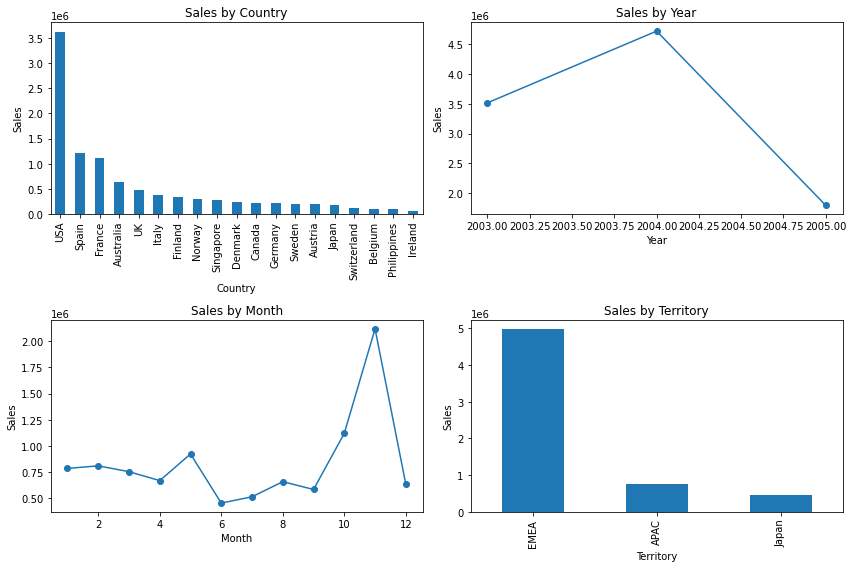

In [84]:
"""
MATPLOTLIB based dashboard
"""

import matplotlib.pyplot as plt

# Create subplots for the dashboard
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Sales by Country (Bar Chart)
data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Sales by Country')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Sales')

# Plot 2: Sales by Year (Line Chart)
data.groupby('YEAR_ID')['SALES'].sum().plot(kind='line', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Sales by Year')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Sales')

# Plot 3: Add your plot for Sales by Month here
data.groupby('MONTH_ID')['SALES'].sum().plot(kind='line', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Sales by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Sales')

# Plot 4: Add your plot for Sales by Territory here
data.groupby('TERRITORY')['SALES'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Sales by Territory')
axes[1, 1].set_xlabel('Territory')
axes[1, 1].set_ylabel('Sales')

# Adjust spacing between subplots
plt.tight_layout()

# Show the dashboard
plt.show()


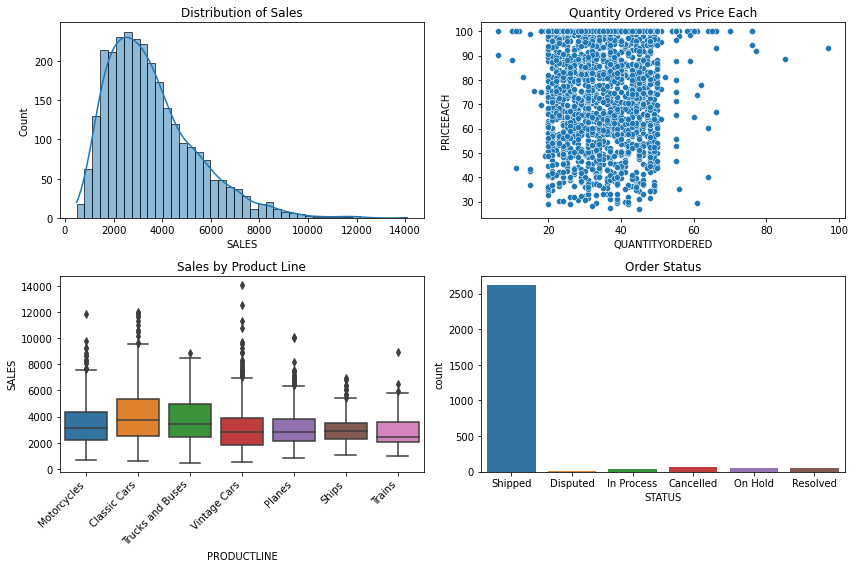

In [85]:
"""
Seaborn based dashboard
"""


import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for the dashboard
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Distribution of Sales
sns.histplot(data['SALES'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sales')

# Plot 2: Scatter plot of Quantity Ordered vs Price Each
sns.scatterplot(data=data, x='QUANTITYORDERED', y='PRICEEACH', ax=axes[0, 1])
axes[0, 1].set_title('Quantity Ordered vs Price Each')

# Plot 3: Box plot of Sales by Product Line
sns.boxplot(data=data, x='PRODUCTLINE', y='SALES', ax=axes[1, 0])
axes[1, 0].set_title('Sales by Product Line')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Plot 4: Count plot of Order Status
sns.countplot(data=data, x='STATUS', ax=axes[1, 1])
axes[1, 1].set_title('Order Status')

# Adjust spacing between subplots
plt.tight_layout()

# Show the dashboard
plt.show()


Column
    [0] Markdown(str)
    [1] Row
        [0] HoloViews(Bars)
        [1] HoloViews(Scatter)
    [2] Row
        [0] HoloViews(Bars)
    [3] Str(AxesSubplot)

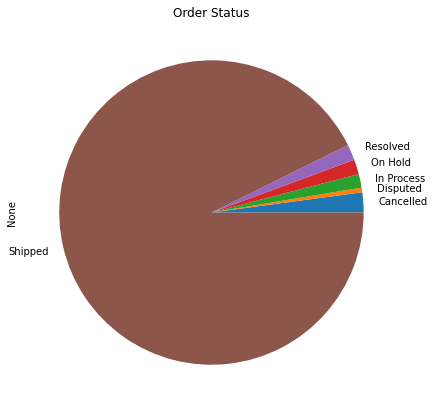

In [86]:
"""
HVplot based dashboard
"""


import pandas as pd
import hvplot.pandas
import panel as pn


# Create the dashboard layout
dashboard = pn.Column(
    "# Sales Dashboard",
    pn.Row(
        data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).hvplot(kind='bar',title='Sales by Country').opts(xticks=range(len(data['COUNTRY'])), xrotation=45),
        data.groupby('YEAR_ID')['SALES'].sum().hvplot(kind='scatter', marker='o', title='Sales by Year')
    ),
    pn.Row(
        data.groupby('PRODUCTLINE')['SALES'].sum().hvplot(kind='bar', title='Sales by Product Line'),
    )
)

fig, ax = plt.subplots(figsize=(7, 7))
data.groupby('STATUS').size().plot.pie(title='Order Status', ax=ax)
dashboard.append(ax)
# Display the dashboard
dashboard.servable()
